# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
random.seed(21)

# Plotting the data in graph from Input File

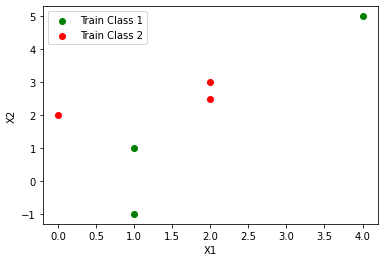

In [2]:
dataset = pd.read_csv('train-perceptron.txt', sep=' ', header= None)
class_1 = dataset[dataset.iloc[:,2]==1]
class_2 =  dataset[dataset.iloc[:,2]==2]

X_1 =  class_1.iloc[:,:-1].values
X_2 = class_2.iloc[:,:-1].values

plt.scatter(X_1[:,0],X_1[:,1], color ='green', label='Train Class 1')
plt.scatter(X_2[:,0],X_2[:,1], color ='red', label='Train Class 2')
plt.xlabel('X1')
plt.ylabel('X2')

plt.legend(loc='upper left', fontsize=10)
plt.show()

# Generating Higher Dimensional Data and Normalizing Class 2

In [3]:
high_dim_data = pd.DataFrame({'x1^2':dataset.iloc[:,0]*dataset.iloc[:,0],
                            'x2^2':dataset.iloc[:,1]*dataset.iloc[:,1],
                           'x1*x2':dataset.iloc[:,0]*dataset.iloc[:,1],
                            'x1': dataset.iloc[:,0], 
                           'x2':dataset.iloc[:,1], 
                            '1':1,'label': dataset.iloc[:,2] })
#normalization
y = high_dim_data.apply( lambda x:x*-1 if x.iloc[6]==2 else x, axis= 1).iloc[:,:-1].values
y[[2,3,4,5]] = y[[5,2,3,4]]

# Implementing the Perceptron Algorithm

In [4]:
weight = [np.ones(shape = (1,6)), np.zeros(shape = (1,6)), np.random.rand(1,6)]

num_of_data = len(dataset.index)

w_zero_itr =[]
w_one_itr = []
w_rand_itr = []

w_zero_update =[]
w_one_update = []
w_rand_update = []

## One At a Time

In [5]:
for x in range (3):
    list_of_itr_one = []
    list_of_update_one = []
    for alpha in range (10):
        learning_rate = (alpha+1)*0.1
        w = weight[x]
        cnt = 0
        correctly_classified = 0
        iterations = 0
        while(correctly_classified != num_of_data ):
            iterations = iterations + 1
            correctly_classified = 0
            y_sum = np.zeros(shape = (1,6))
            for i in range (num_of_data):
                wTy = np.matmul(w, y[i,:].reshape(6,1))
                if(wTy>0):
                    correctly_classified =  correctly_classified + 1
                else:
                    w = w + learning_rate*y[i,:].reshape(1,6)
                    cnt = cnt+1

        list_of_itr_one.append(iterations)
        list_of_update_one.append(cnt)
        
    if(x==1):
        w_zero_itr.append(list_of_itr_one)
        w_zero_update.append(list_of_update_one)
    elif (x==0):
        w_one_itr.append(list_of_itr_one)
        w_one_update.append(list_of_update_one)
    else:
        w_rand_itr.append(list_of_itr_one)
        w_rand_update.append(list_of_update_one)
        

## Many At a Time

In [6]:
for x in range (3):
    list_of_itr_many = []
    list_of_update_many= []
    for alpha in range (10):
        learning_rate = (alpha+1)*0.1
        
        w = weight[x]
        correctly_classified = 0
        iterations = 0
        while(correctly_classified != num_of_data ):
            iterations = iterations + 1
            correctly_classified = 0
            y_sum = np.zeros(shape = (1,6))
            for i in range (num_of_data):
                wTy = np.matmul(w, y[i,:].reshape(6,1))
                if(wTy>0):
                    correctly_classified =  correctly_classified + 1
                else:
                    y_sum = y_sum + y[i,:].reshape(1,6)
    
            w = w + learning_rate*y_sum
        list_of_itr_many.append(iterations)
        list_of_update_many.append(iterations-1)

    if(x==1):
        w_zero_itr.append(list_of_itr_many)
        w_zero_update.append(list_of_update_many)
    elif (x==0):
        w_one_itr.append(list_of_itr_many)
        w_one_update.append(list_of_update_many)
    else:
        w_rand_itr.append(list_of_itr_many)
        w_rand_update.append(list_of_update_many)

# Table showing the number of Iterations according to Learning Rates

## Weight All Zeros

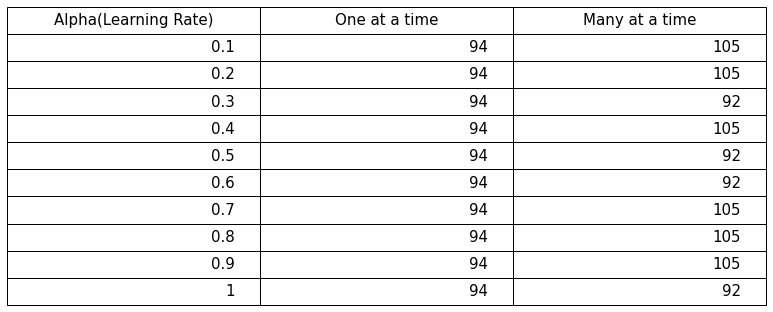

In [7]:
fig, ax = plt.subplots()
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
values = []

for i in range(len(w_zero_itr[0])):
    values.append([learning_rate[i],w_zero_itr[0][i],w_zero_itr[1][i]])
     
col_name = ['Alpha(Learning Rate)','One at a time','Many at a time']
table = ax.table(cellText=values,colLabels = col_name, loc = 'center')

fig.tight_layout()
table.set_fontsize(15)
table.scale(2,2)
ax.axis('off')
plt.show()

## Weight All Ones

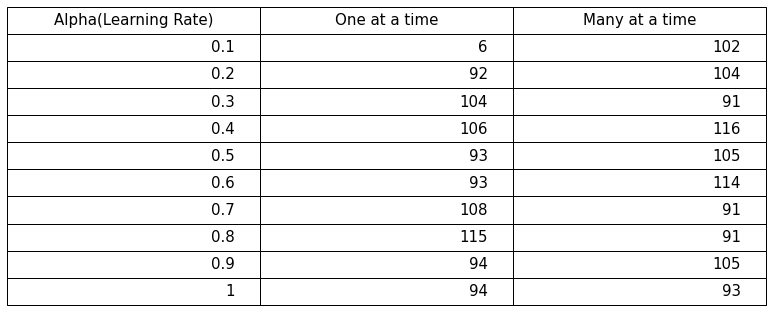

In [21]:
fig, ax = plt.subplots()
values = []

for i in range(len(w_one_itr[0])):
    values.append([learning_rate[i],w_one_itr[0][i],w_one_itr[1][i]])
     
col_name = ['Alpha(Learning Rate)','One at a time','Many at a time']
table = ax.table(cellText=values,colLabels = col_name, loc = 'center')

fig.tight_layout()
table.set_fontsize(15)
table.scale(2,2)
ax.axis('off')
plt.show()

## Weight All Random

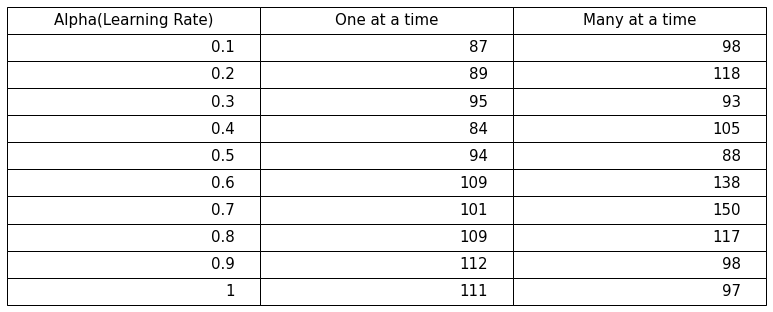

In [9]:
fig, ax = plt.subplots()
values = []

for i in range(len(w_rand_itr[0])):
    values.append([learning_rate[i],w_rand_itr[0][i],w_rand_itr[1][i]])
     
col_name = ['Alpha(Learning Rate)','One at a time','Many at a time']
table = ax.table(cellText=values,colLabels = col_name, loc = 'center')

fig.tight_layout()
table.set_fontsize(15)
table.scale(2,2)
ax.axis('off')
plt.show()

# Visualizing the table data using Bar Chart

## Weight All Initialized Zero

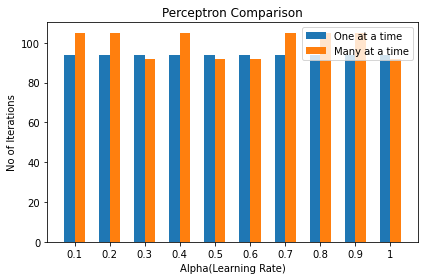

In [10]:
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
num_of_itr_one = w_zero_itr[0]
num_of_itr_many = w_zero_itr[1]

x = np.arange(len(learning_rate))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rectangle1 = ax.bar(x - width/2, num_of_itr_one, width, label='One at a time')
rects2 = ax.bar(x + width/2, num_of_itr_many, width, label='Many at a time')

ax.set_xlabel('Alpha(Learning Rate)')
ax.set_ylabel('No of Iterations')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(learning_rate)
ax.legend()

fig.tight_layout()

plt.show()

## Weight All Initialized One

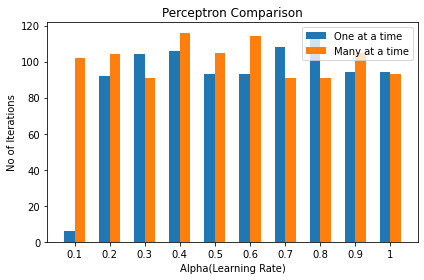

In [11]:
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
num_of_itr_one = w_one_itr[0]
num_of_itr_many = w_one_itr[1]

x = np.arange(len(learning_rate))  
width = 0.3  

fig, ax = plt.subplots()
rectangle1 = ax.bar(x - width/2, num_of_itr_one, width, label='One at a time')
rects2 = ax.bar(x + width/2, num_of_itr_many, width, label='Many at a time')

ax.set_xlabel('Alpha(Learning Rate)')
ax.set_ylabel('No of Iterations')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(learning_rate)
ax.legend()

fig.tight_layout()

plt.show()

## Weight All Initialized Randomly

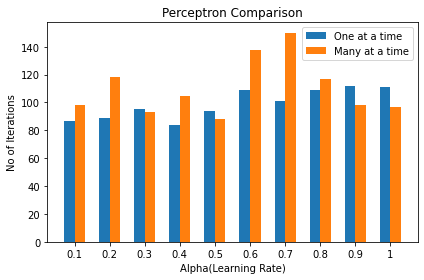

In [12]:
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
num_of_itr_one = w_rand_itr[0]
num_of_itr_many = w_rand_itr[1]

x = np.arange(len(learning_rate))  
width = 0.3 

fig, ax = plt.subplots()
rectangle1 = ax.bar(x - width/2, num_of_itr_one, width, label='One at a time')
rectangle2 = ax.bar(x + width/2, num_of_itr_many, width, label='Many at a time')

ax.set_xlabel('Alpha(Learning Rate)')
ax.set_ylabel('No of Iterations')
ax.set_title('Perceptron Comparison')
ax.set_xticks(x)
ax.set_xticklabels(learning_rate)
ax.legend()

fig.tight_layout()

plt.show()

# 4(a)
In perceptron algorithm we seperate two classes using linear discriminant. If the two classes are not seperable in lower dimensional space, we convert it to the higher dimensional space using the given polynomial discriminant function. In the above task we converted  two dimensional data to six dimensional data.

# 4(b) Table showing Number of Weight Updates according to Learning Rates

## Table for all zero weight

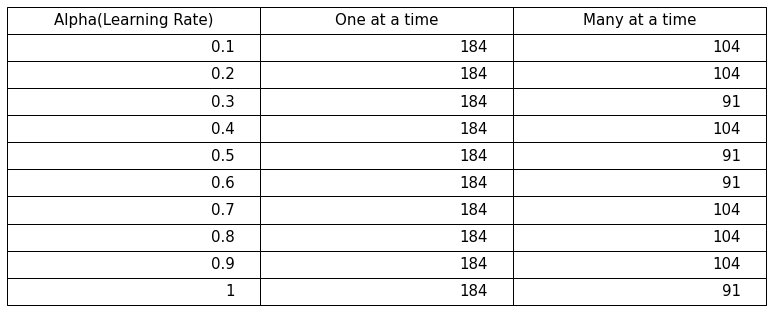

In [13]:
fig, ax = plt.subplots()
learning_rate = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
values = []

for i in range(len(w_zero_update[0])):
    values.append([learning_rate[i],w_zero_update[0][i],w_zero_update[1][i]])
     
col_name = ['Alpha(Learning Rate)','One at a time','Many at a time']
table = ax.table(cellText=values,colLabels = col_name, loc = 'center')

fig.tight_layout()
table.set_fontsize(15)
table.scale(2,2)
ax.axis('off')
plt.show()

## Table for All one weight

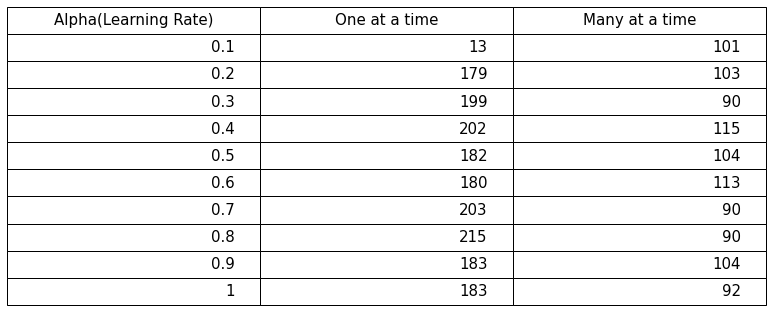

In [14]:
fig, ax = plt.subplots()
values = []

for i in range(len(w_one_update[0])):
    values.append([learning_rate[i],w_one_update[0][i],w_one_update[1][i]])
     
col_name = ['Alpha(Learning Rate)','One at a time','Many at a time']
table = ax.table(cellText=values,colLabels = col_name, loc = 'center')

fig.tight_layout()
table.set_fontsize(15)
table.scale(2,2)
ax.axis('off')
plt.show()

## Table for random weights

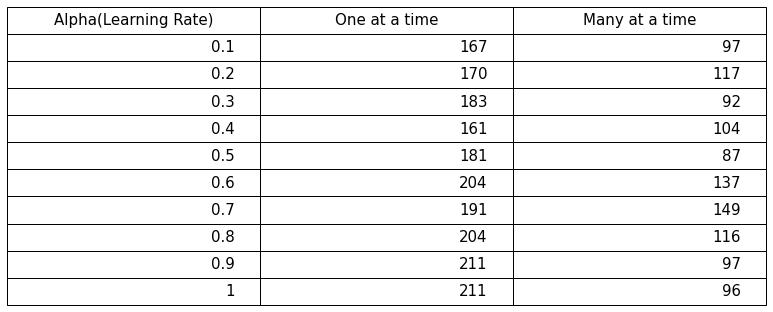

In [15]:
fig, ax = plt.subplots()
values = []

for i in range(len(w_rand_update[0])):
    values.append([learning_rate[i],w_rand_update[0][i],w_rand_update[1][i]])
     
col_name = ['Alpha(Learning Rate)','One at a time','Many at a time']
table = ax.table(cellText=values,colLabels = col_name, loc = 'center')

fig.tight_layout()
table.set_fontsize(15)
table.scale(2,2)
ax.axis('off')
plt.show()